In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
%matplotlib inline

In [3]:
df = pd.read_csv("adv.csv")

## KNN Regression


In [4]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


## KNN dengan k=1

In [5]:
x_true = df.TV.iloc[5:13]
y_true =df.Sales.iloc[5:13]

In [6]:
# Urutkan data berdasarkan nilai x
idx = np.argsort(x_true).values
x_true = x_true.iloc[idx].values
y_true = y_true.iloc[idx].values

In [7]:
def find_nearest(array, value):
    idx = pd.Series(np.abs(array-value)).idxmin()
    return idx, array[idx]

In [8]:
x = np.linspace(np.min(x_true), np.max(x_true))
y = np.zeros((len(x)))


In [9]:
for i, xi in enumerate(x):
    y[i] = y_true[find_nearest(x_true, xi)[0]]

Text(0, 0.5, 'Sales in $1000')

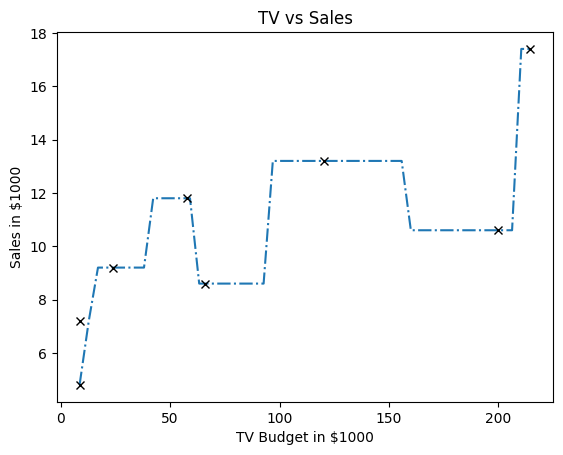

In [10]:
# Prediction plot
plt.plot(x, y, '-.')

# Original data
plt.plot(x_true, y_true, 'kx')

plt.title('TV vs Sales')
plt.xlabel("TV Budget in $1000")
plt.ylabel("Sales in $1000")


## KNN for k>=1 using sklearn

In [11]:
x = df[["TV"]] #dataframe
y = df["Sales"]

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=.6, random_state=42)

In [13]:
k_value_min = 1
k_value_max = 70
k_list = np.linspace(k_value_min, k_value_max, 70)

C:\Users\X240\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\Users\X240\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\Users\X240\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.


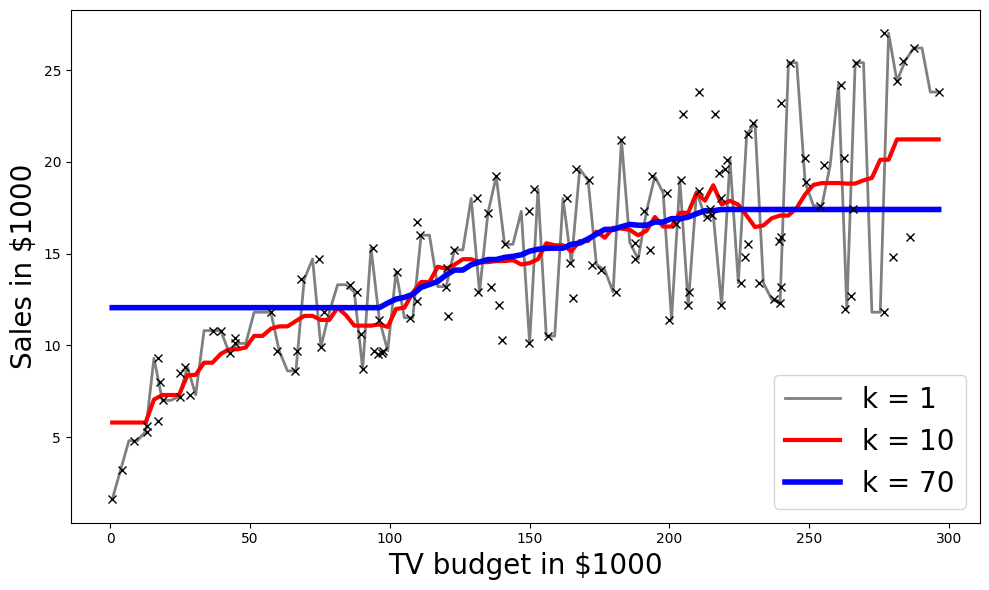

In [14]:
fig, ax = plt.subplots(figsize=(10,6))

j = 0

for k_value in k_list:
    model = KNeighborsRegressor(n_neighbors=int(k_value))
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    colors = ['grey', 'r', 'b']

    if k_value in [1, 10, 70]:
        x_vals = np.linspace(x.min(), x.max(), 100)
        ypreds = model.predict(x_vals)
        ax.plot(x_vals, ypreds, '-', label = f'k = {int(k_value)}', linewidth=j+2, color = colors[j])
        j+=1
ax.legend(loc='lower right', fontsize = 20)
ax.plot(x_train, y_train, 'x', label='train', color = 'k')
ax.set_xlabel('TV budget in $1000',fontsize=20)
ax.set_ylabel('Sales in $1000',fontsize=20)
plt.tight_layout()
plt.show()